In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pickle

# ===========================
# Load Dataset (cleaned one)
# ===========================
df = pd.read_csv("D:/Rainfall_Prediction_Project/notebooks/weatherAUS_cleaned.csv")

# ===========================
# Features you used in training (11 features)
# ===========================
features = [
    "Rainfall", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm",
    "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm",
    "Temp9am", "Temp3pm", "Cloud9am"
]

X = df[features].fillna(df[features].mean())
y = df["RainTomorrow_Yes"]

# ===========================
# Train-test split
# ===========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===========================
# Scale data
# ===========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===========================
# Train Logistic Regression Model (Balanced)
# ===========================
model = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
model.fit(X_train_scaled, y_train)

# ===========================
# Evaluate
# ===========================
print("Accuracy:", model.score(X_test_scaled, y_test))

# ===========================
# Save model + scaler
# ===========================
with open("D:/Rainfall_Prediction_Project/app/model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("D:/Rainfall_Prediction_Project/app/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ Balanced Model and Scaler saved successfully!")


Accuracy: 0.7822425409047161
✅ Balanced Model and Scaler saved successfully!


In [ ]:
# =====================================
# 1. Import Required Libraries
# =====================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

# =====================================
# 2. Load Dataset
# =====================================
data = pd.read_csv("WeatherAUS.csv")   # <-- update file path if needed

# =====================================
# 3. Initial Exploration
# =====================================
print("\n--- Head ---")
print(data.head())

print("\n--- Info ---")
print(data.info())

print("\n--- Describe ---")
print(data.describe())

# check missing values
print("\n--- Missing Values ---")
print(data.isnull().sum())

# visualize missing values
msno.matrix(data)
plt.show()

# =====================================
# 4. Handling Missing Values
# =====================================
# Separate categorical & numeric columns
num_cols = data.select_dtypes(include=[np.number]).columns
cat_cols = data.select_dtypes(include=['object']).columns

# Impute numeric with mean
num_imputer = SimpleImputer(strategy='mean')
data[num_cols] = num_imputer.fit_transform(data[num_cols])

# Impute categorical with mode (most frequent)
cat_imputer = SimpleImputer(strategy='most_frequent')
data[cat_cols] = cat_imputer.fit_transform(data[cat_cols])

print("\n--- Missing Values After Imputation ---")
print(data.isnull().sum().sum())  # should be 0

# =====================================
# 5. Data Visualization
# =====================================

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot (optional: may take time if dataset is big)
# sns.pairplot(data.sample(500))  # sample to reduce load
# plt.show()

# Boxplot example
plt.figure(figsize=(8,6))
sns.boxplot(x=data["Rainfall"])
plt.title("Boxplot of Rainfall")
plt.show()

# =====================================
# 6. Splitting Independent & Dependent Variables
# =====================================
y = data['RainTomorrow']
X = data.drop('RainTomorrow', axis=1)

# Encode categorical variables
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Encode target
le_y = LabelEncoder()
y = le_y.fit_transform(y)   # Yes → 1, No → 0

# =====================================
# 7. Train-Test Split
# =====================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# =====================================
# 8. Train Models
# =====================================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    print(f"\n----- {name} -----")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


In [28]:
print(df.columns.tolist())


['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Temp9am', 'Temp3pm', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_Delhi', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'L

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pickle

# ===========================
# Load Cleaned Dataset
# ===========================
df = pd.read_csv("D:/Rainfall_Prediction_Project/notebooks/weatherAUS_cleaned.csv")

# ===========================
# Drop rows with missing target
# ===========================
df = df.dropna(subset=["RainTomorrow_Yes"])

# ===========================
# Select 11 features
# ===========================
# ===========================
# Select 11 features (available in cleaned dataset)
# ===========================
features = [
    "Rainfall", "Humidity9am", "Humidity3pm",
    "Pressure9am", "Pressure3pm",
    "Temp9am", "Temp3pm",
    "Cloud9am",
    "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm"
]

# Handle missing values in features
X = df[features].fillna(df[features].mean())

# Target
y = df["RainTomorrow_Yes"]

# ===========================
# Train-test split
# ===========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===========================
# Scale data
# ===========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===========================
# Train Logistic Regression Model
# ===========================
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# ===========================
# Evaluate
# ===========================
print("Accuracy:", model.score(X_test_scaled, y_test))

# ===========================
# Save model + scaler
# ===========================
with open("D:/Rainfall_Prediction_Project/app/model1.pkl", "wb") as f:
    pickle.dump(model, f)

with open("D:/Rainfall_Prediction_Project/app/scaler1.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ Model and Scaler saved successfully!")


Accuracy: 0.8377560841468445
✅ Model and Scaler saved successfully!


In [7]:
%pip install matplotlib seaborn missingno scikit-learn xgboost pandas numpy
%pip install matplotlib seaborn missingno scikit-learn xgboost pandas numpy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install matplotlib seaborn missingno scikit-learn xgboost


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/113.8 kB ? eta -:--:--
     --------- --------------------------- 30.7/113.8 kB 660.6 kB/s eta 0:00:01
     -------------------------------------  112.6/113.8 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 113.8/113.8 kB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.2/8.1 MB 6.3 MB/s eta 0:00:02
   - -------------------------------------- 0.3/8.1 MB 3.8 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/8.1 MB 4.7 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/8.1 MB 3.6 MB/s eta 0:00:03
   --- ------------------------------------ 0.7/8.1 MB 3.6 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/8.1 MB 3.4 MB/s eta 0:00:03
   ---- ----------------------------------- 0.8/8.1 MB 3.3 MB/s eta 0:00:03
   ---- --------------


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



--- Head ---
        Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-12-01    Delhi     13.4     22.9       0.6          NaN       NaN   
1 2008-12-02    Delhi      7.4     25.1       0.0          NaN       NaN   
2 2008-12-03    Delhi     12.9     25.7       0.0          NaN       NaN   
3 2008-12-04    Delhi      9.2     28.0       0.0          NaN       NaN   
4 2008-12-05    Delhi     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
0       1

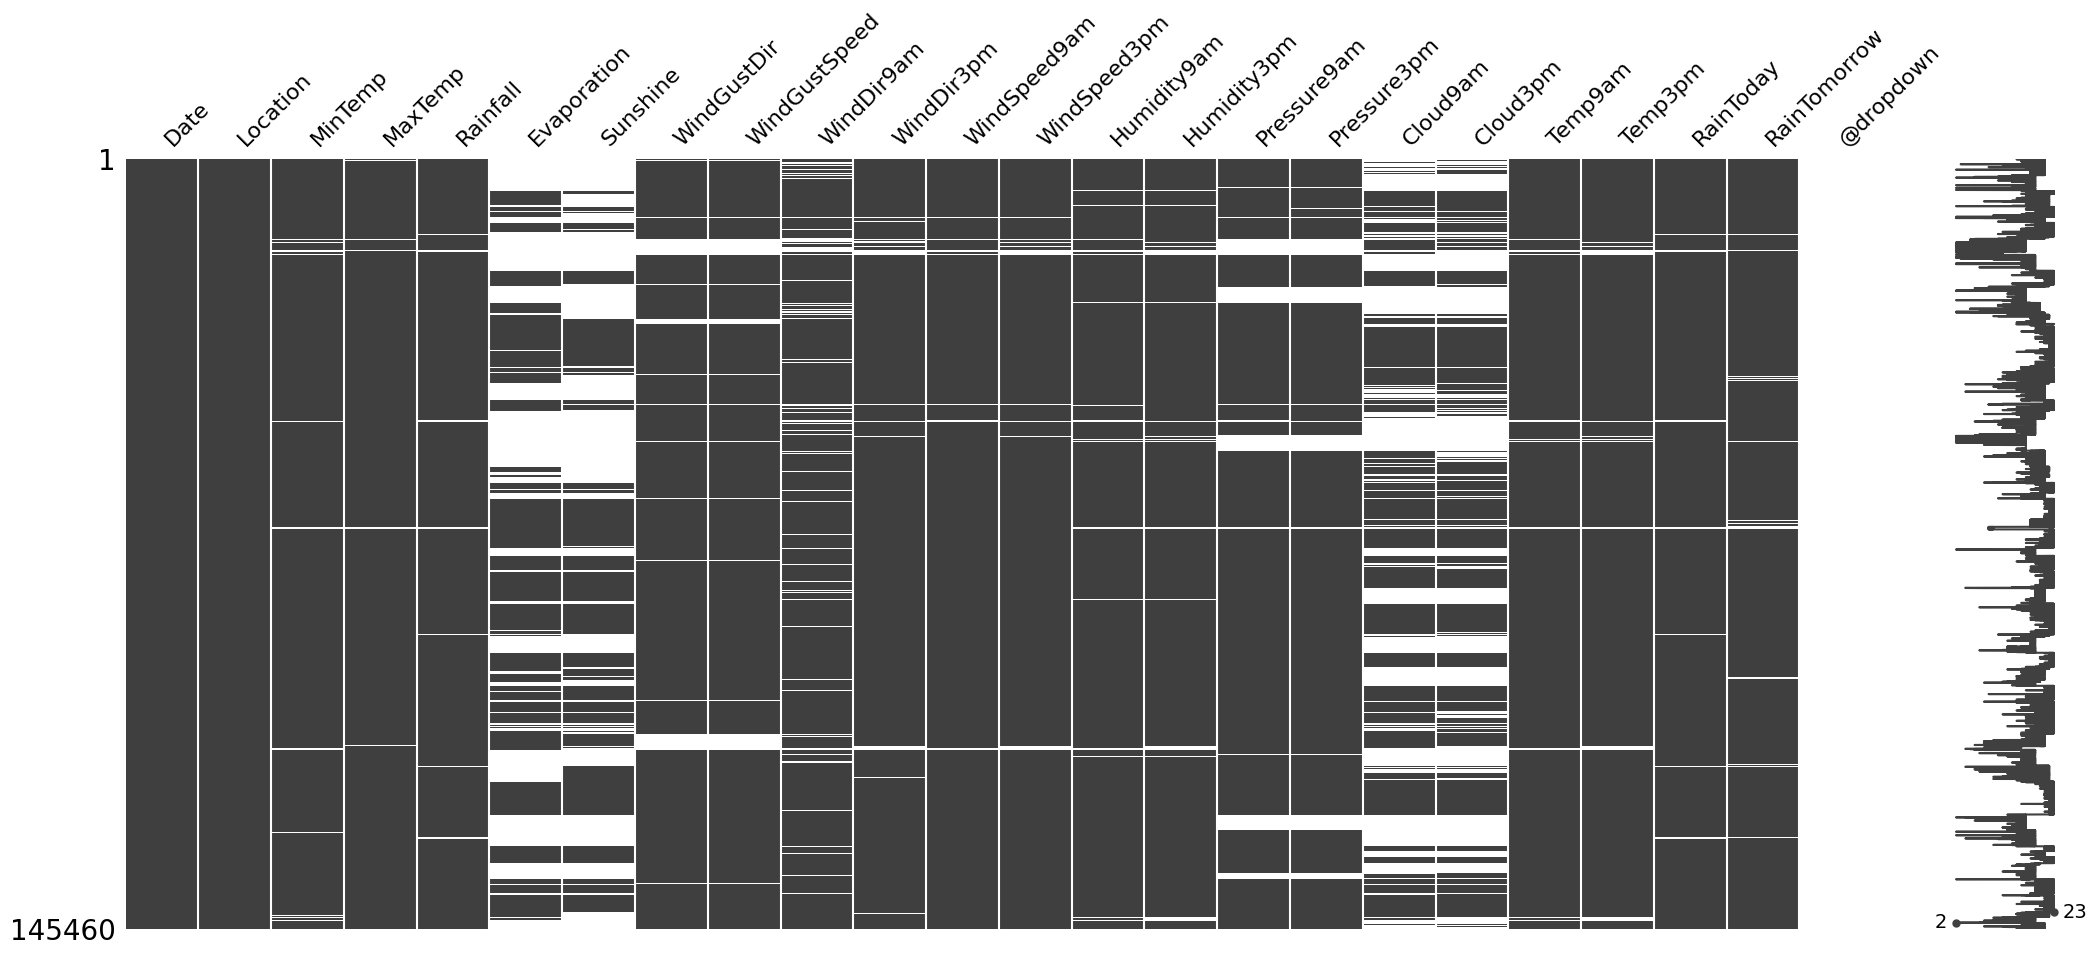

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['@dropdown']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(



--- Missing Values After Imputation ---
31634


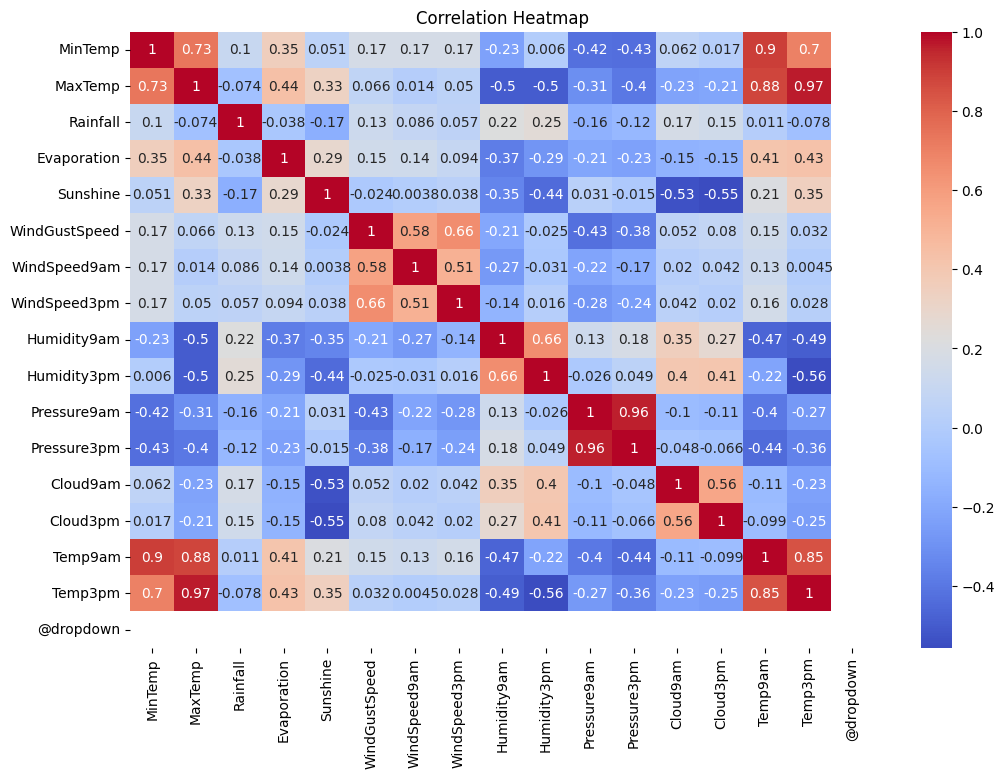

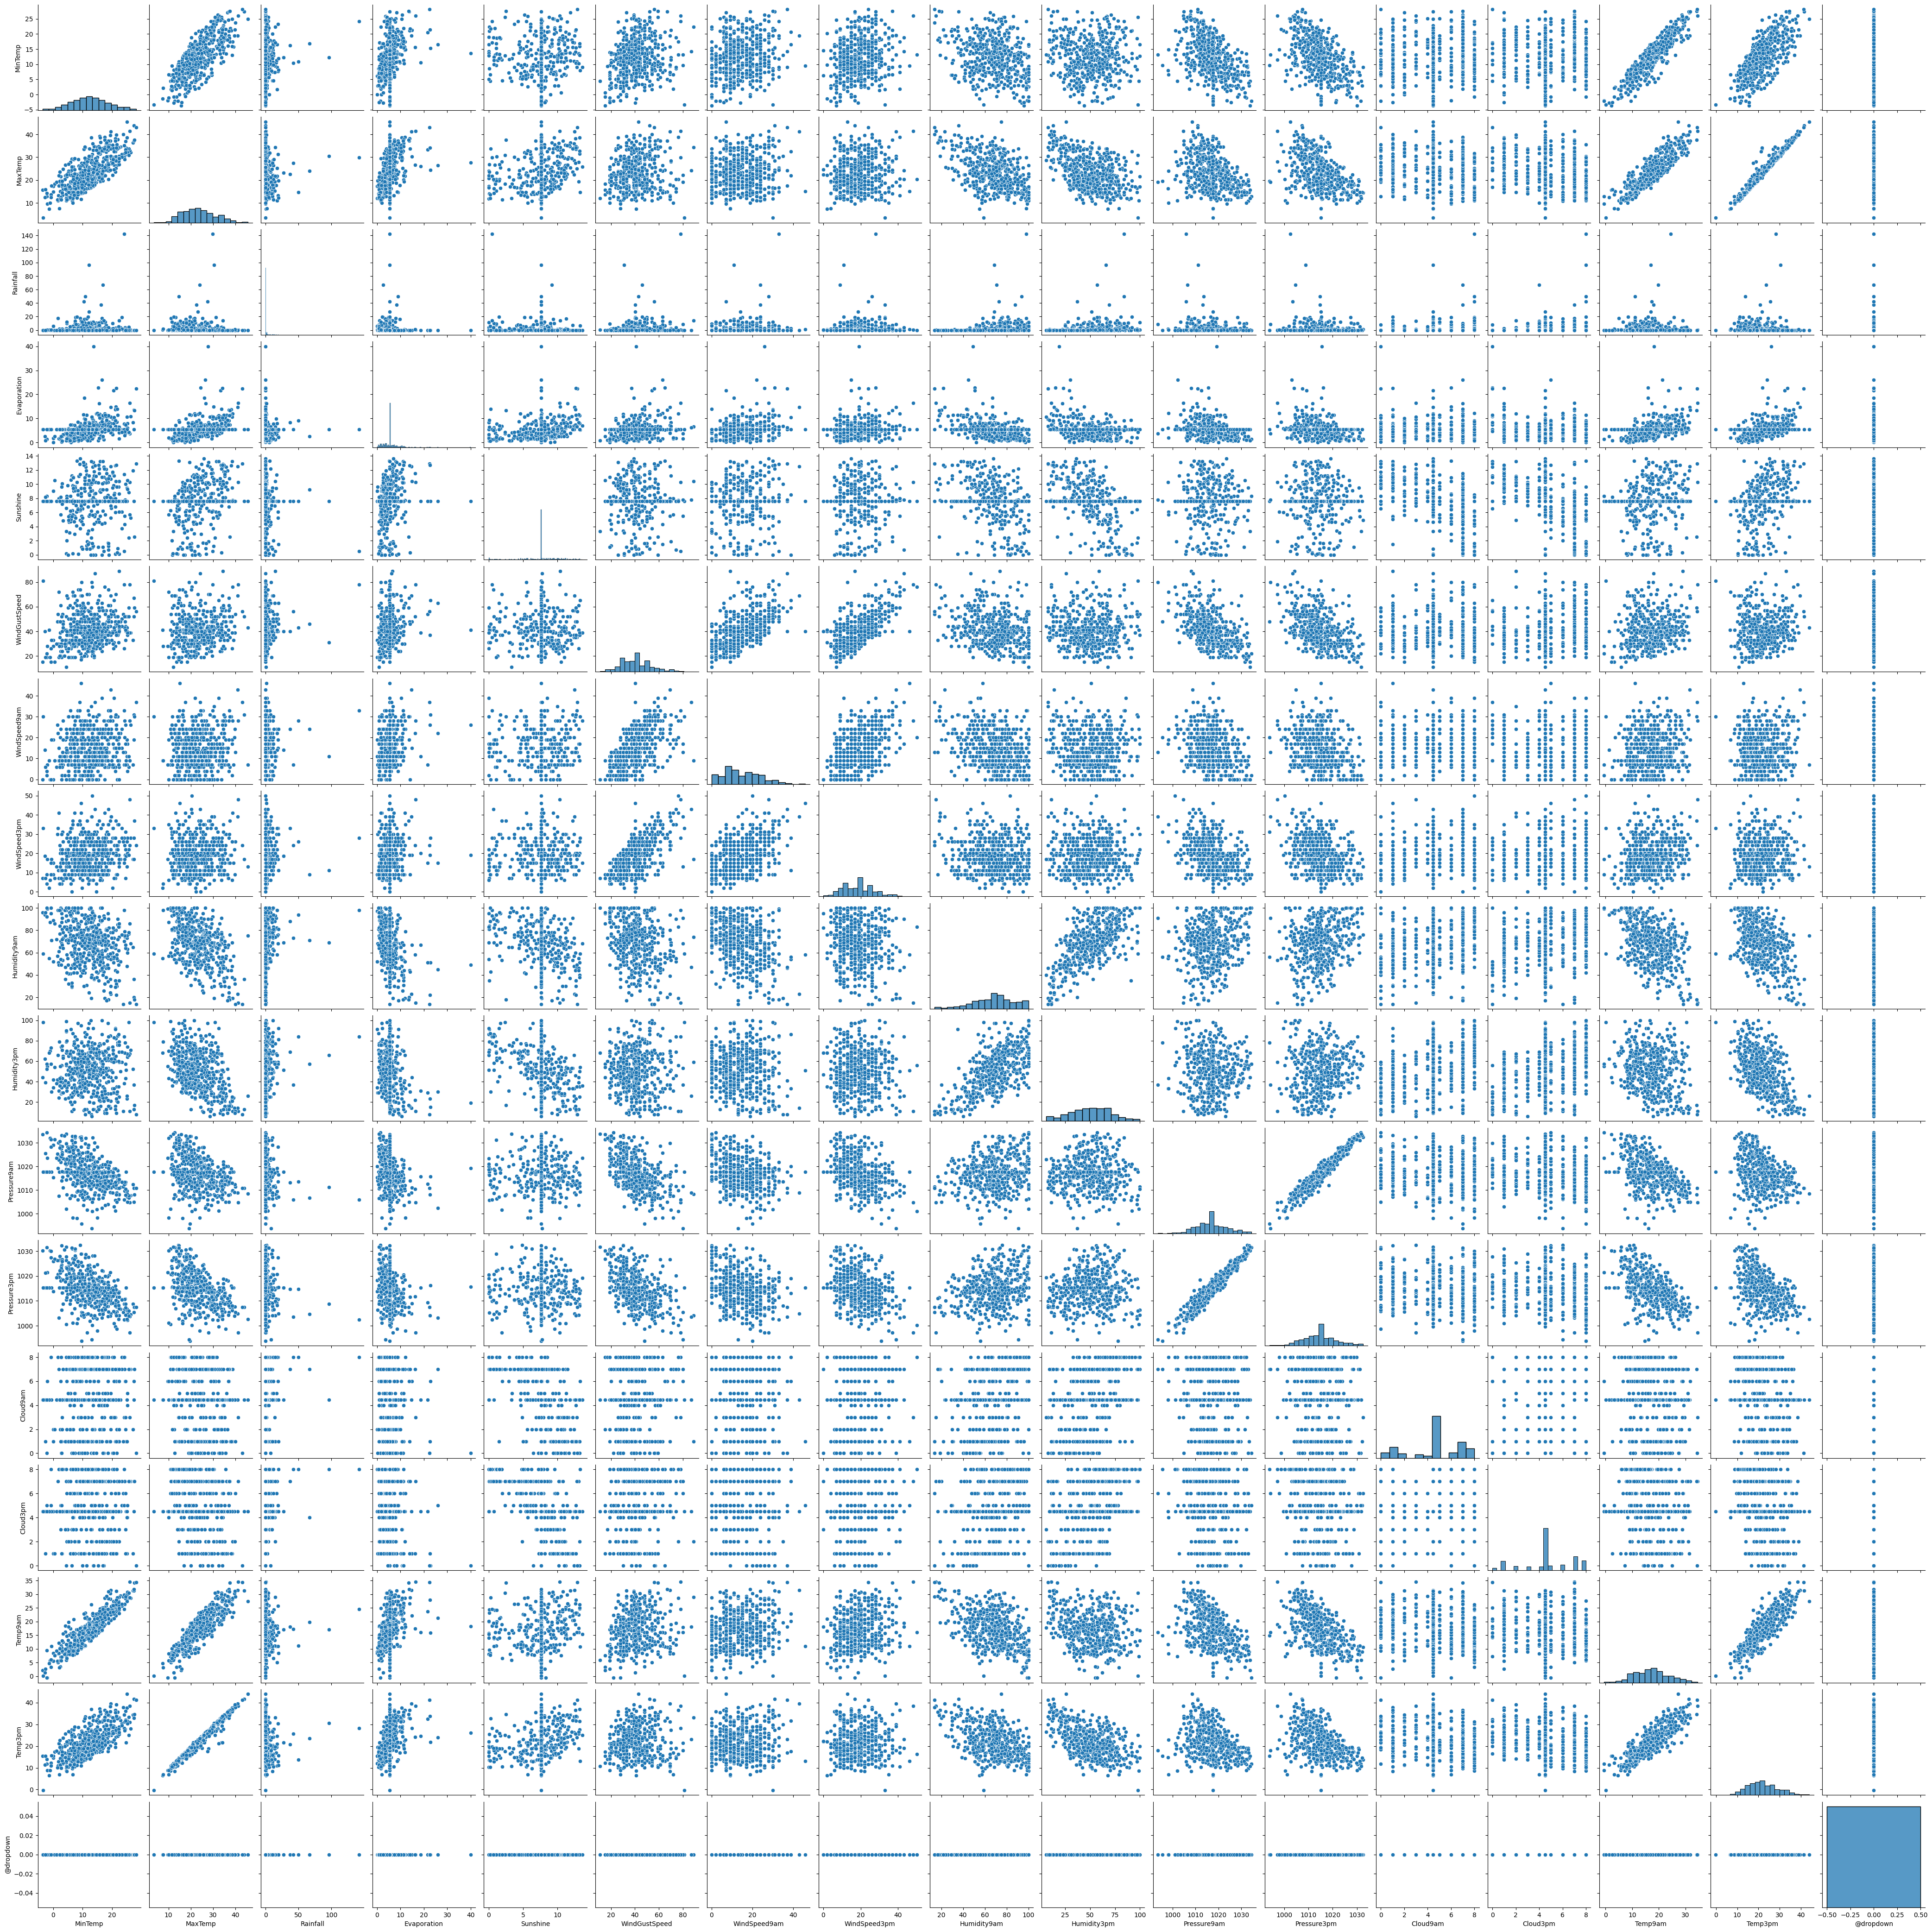

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [01:26:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.8404372336037399
              precision    recall  f1-score   support

           0       0.87      0.95      0.90     22119
           1       0.73      0.51      0.60      6322
           2       0.63      0.49      0.55       651

    accuracy                           0.84     29092
   macro avg       0.74      0.65      0.68     29092
weighted avg       0.83      0.84      0.83     29092



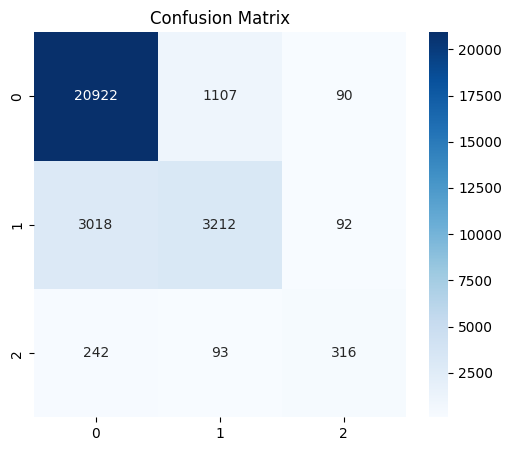

✅ Pipeline saved for RainTomorrow prediction with 11 features


In [5]:
# =====================================
# 1. Import Required Libraries
# =====================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Models
from sklearn.pipeline import Pipeline
import xgboost as xgb
import joblib

# =====================================
# 2. Load Dataset
# =====================================
data = pd.read_excel("D:/Rainfall_Prediction_Project/data/Weather.xlsx")

# =====================================
# 3. Initial Exploration
# =====================================
print("\n--- Head ---")
print(data.head())

print("\n--- Info ---")
print(data.info())

print("\n--- Describe ---")
print(data.describe())

# Check missing values
print("\n--- Missing Values ---")
print(data.isnull().sum())

# Visualize missing values
msno.matrix(data)
plt.show()

# =====================================
# 4. Handling Missing Values
# =====================================
num_imputer = SimpleImputer(strategy='mean')          # numeric
cat_imputer = SimpleImputer(strategy='most_frequent') # categorical

num_cols = data.select_dtypes(include=[np.number]).columns
cat_cols = data.select_dtypes(include=['object']).columns

# Numeric columns
for col in num_cols:
    data[col] = num_imputer.fit_transform(data[[col]])
    
# Categorical columns
for col in num_cols:
    data[col] = num_imputer.fit_transform(data[[col]]).ravel()


print("\n--- Missing Values After Imputation ---")
print(data.isnull().sum().sum())  # should be 0

# =====================================
# 5. Data Visualization
# =====================================
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot (sample 500 rows to reduce computation)
sns.pairplot(data[num_cols].sample(500))
plt.show()



# =====================================
# 6. Select Features
# =====================================
selected_features = [
    "Rainfall", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm",
    "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm",
    "Temp9am", "Temp3pm", "Cloud9am"
]

X = data[selected_features]

# Target: RainTomorrow
y = data['RainTomorrow']

# Encode target
le_y = LabelEncoder()
y = le_y.fit_transform(y)   # Yes → 1, No → 0

# =====================================
# 7. Train-Test Split
# =====================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =====================================
# 8. Build Pipeline & Train Model
# =====================================
pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", xgb.XGBClassifier(eval_metric="logloss", use_label_encoder=False))
])

pipeline.fit(X_train, y_train)

# =====================================
# 9. Evaluate Model
# =====================================
y_pred = pipeline.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# =====================================
# 10. Save Pipeline
# =====================================
joblib.dump(pipeline, "D:/Rainfall_Prediction_Project/app/rainfall_model_Today.pkl")
print("✅ Pipeline saved for RainTomorrow prediction with 11 features")


In [4]:
# =====================================
# 1. Import joblib (or pickle)
# =====================================
import joblib

# =====================================
# 2. Train your best model (example XGBoost)
# =====================================
import xgboost as xgb

best_model = xgb.XGBClassifier(
    eval_metric='logloss',
    scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1])  # imbalance handling
)
best_model.fit(X_train, y_train)

# =====================================
# 3. Save the trained model
# =====================================
joblib.dump(best_model, "D:/Rainfall_Prediction_Project/app/rainfall_model.pkl")

# =====================================
# 4. Save the scaler (since app.py uses it)
# =====================================
joblib.dump(scaler, "D:/Rainfall_Prediction_Project/app/scaler.pkl")

print("✅ Model and Scaler saved in /app folder")


✅ Model and Scaler saved in /app folder


In [12]:
print(data[num_cols].isnull().all())


MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustSpeed    False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
@dropdown         True
dtype: bool


In [19]:
# ==============================
# Model Evaluation
# ==============================
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
y_pred = model.predict(X_test_scaled)

# Accuracy
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("\n🔍 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Accuracy: 0.8553897978825794

📊 Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.96      0.91     22770
        True       0.77      0.48      0.59      6322

    accuracy                           0.86     29092
   macro avg       0.82      0.72      0.75     29092
weighted avg       0.85      0.86      0.84     29092


🔍 Confusion Matrix:
 [[21873   897]
 [ 3310  3012]]


In [25]:
print(df.columns)


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', '@dropdown'],
      dtype='object')


In [18]:
# ==============================
# Train-Test Split
# ==============================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib

# Features (X) and Target (y)
X = df.drop("RainTomorrow_Yes", axis=1)
y = df["RainTomorrow_Yes"]   # Already 0/1 column after get_dummies()

# Split data
X = X.apply(pd.to_numeric, errors="coerce")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ==============================
# Scale numeric features
# ==============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==============================
# Train Model
# ==============================
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train_scaled, y_train)

# ==============================
# Save Model & Scaler
# ==============================
joblib.dump(model, "../model/rainfall_prediction_model.pkl")
joblib.dump(scaler, "../model/scaler.pkl")

print("✅ Model & Scaler saved in model/ folder")


✅ Model & Scaler saved in model/ folder


In [14]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_excel("D:/Rainfall_Prediction_Project/data/Weather.xlsx")

# Quick info
print("Shape before cleaning:", df.shape)
print(df.info())
print(df.describe(include="all"))

# 1. Drop duplicates
df = df.drop_duplicates()

# 2. Handle missing values
# Drop columns with too many missing values (e.g., >40%)
missing_percent = df.isnull().mean() * 100
cols_to_drop = missing_percent[missing_percent > 40].index
df = df.drop(columns=cols_to_drop)

# Fill numerical NaN with median
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical NaN with mode
cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# 3. Convert Date column to datetime
if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# 4. Encode categorical variables (for ML)
df = pd.get_dummies(df, drop_first=True)

# Final check
print("Shape after cleaning:", df.shape)
print(df.head())

# Save cleaned dataset
df.to_csv("weatherAUS_cleaned.csv", index=False)


Shape before cleaning: (145460, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    1